In [1]:
import matplotlib.pyplot as plt
from pmd_beamphysics import ParticleGroup
import numpy as np
from pmd_beamphysics.units import mec2

In [2]:
from eblt.run import EBLT
import os


In [3]:
test = EBLT(input = "example1/eblt.in", workdir = os.environ.get('SCRATCH'), command = '/sdf/group/ad/sw/beta/bin/xeblt')

In [4]:
output = test.run()

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

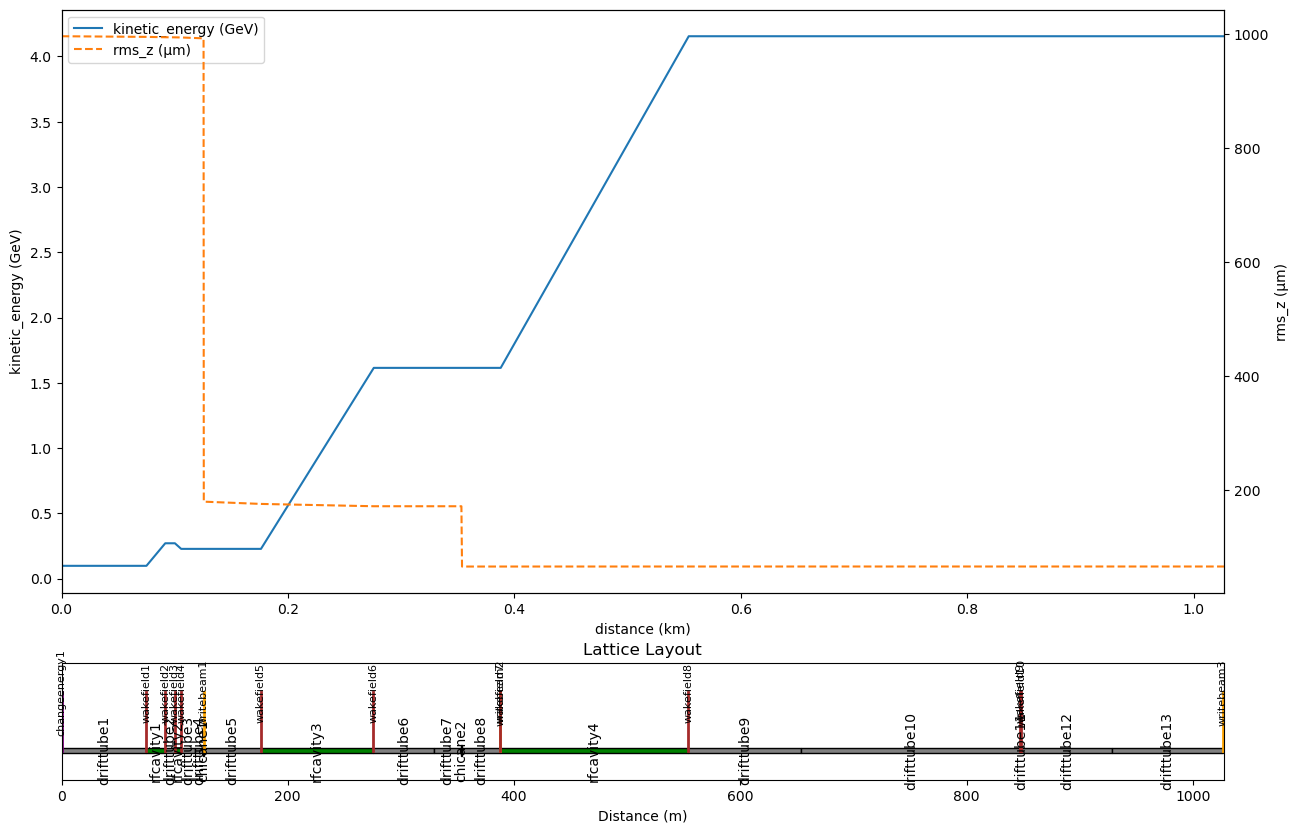

In [5]:
test.plot()

In [6]:
particles = test.output.particle_distributions
print(particles.keys())

dict_keys([211, 213, 221, 101, 201])


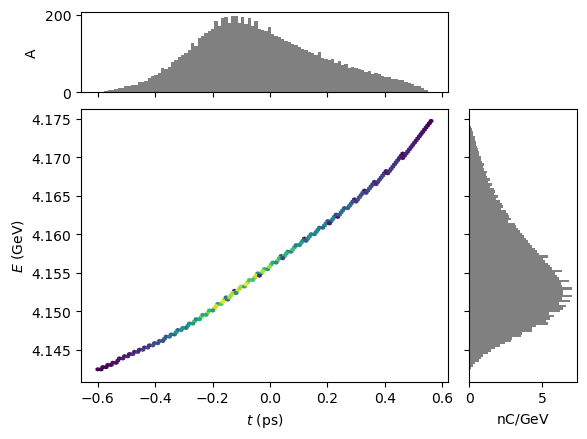

In [7]:
test.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy', bins = 100)

In [8]:
test.archive('./archivefile.h5')

In [9]:
import h5py
with h5py.File("./archivefile.h5", "r") as f:
    print(f['output']['stats']['gamma'])
 

<HDF5 dataset "gamma": shape (34,), type "<f8">


In [10]:
import h5py
with h5py.File("./archivefile.h5", "r") as f:
    print(f['input']['parameters'].keys())


<KeysViewHDF5 []>


In [11]:
test.load_archive('./archivefile.h5')

In [12]:
test.input

EBLTInput(parameters=Parameters(np=1024, nz=128, zmin=-0.002981592, zmax=0.002211398, flagfwd=1, flagdist=200, Iavg=0.13, Ek=92706472.0, mass=511005.0, charge=-1.0, freq=1300000000.0), phase_space_coefficients=PhaseSpaceCoefficients(coefficients=[1.0, 0.0, 0.0]), current_coefficients=Icoefficients(coefficients=[0.0, 0.0, 0.0]), lattice_lines=[ChangeEnergy(energy_increment=5462800.0, name='changeenergy1'), DriftTube(length=74.9744159418, beam_radius=0.0003, name='drifttube1'), Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield1'), RFCavity(length=16.603888, beam_radius=0.0003, gradient=10907447.83, frequency=1300000000.0, phase_deg=-17.43982832, name='rfcavity1'), Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield2'), DriftTube(length=8.5305163742, beam_radius=0.0003, name='drifttube2'), Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=1.0, name='wakefield3'), RFCavity(length=5

In [8]:
import h5py
with h5py.File("./test_input_archive.h5", "w") as f:
    test.input.archive(f)

I am here
parameters {'np': 1024, 'nz': 128, 'zmin': -0.002981592, 'zmax': 0.002211398, 'flagfwd': 1, 'flagdist': 200, 'Iavg': 0.13, 'Ek': 92706472.0, 'mass': 511005.0, 'charge': -1.0, 'freq': 1300000000.0}
np 1024
nz 128
zmin -0.002981592
zmax 0.002211398
flagfwd 1
flagdist 200
Iavg 0.13
Ek 92706472.0
mass 511005.0
charge -1.0
freq 1300000000.0
phase_space_coefficients {'coefficients': {'__python_class_name__': 'list', 'value': array([1., 0., 0.])}}
coefficients {'__python_class_name__': 'list', 'value': array([1., 0., 0.])}
value [1. 0. 0.]
current_coefficients {'coefficients': {'__python_class_name__': 'list', 'value': array([0., 0., 0.])}}
coefficients {'__python_class_name__': 'list', 'value': array([0., 0., 0.])}
value [0. 0. 0.]
lattice_lines {'__python_class_name__': 'list', '__num_items__': 33, 'index_0': {'energy_increment': 5462800.0, 'name': b'changeenergy1'}, 'index_1': {'length': 74.9744159418, 'beam_radius': 0.0003, 'name': b'drifttube1'}, 'index_2': {'length': 0.0, 'mul

In [10]:
import h5py


def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                try:
                    print(pre + '└── ' + key + ' (%d)' % len(val))
                except TypeError:
                    print(pre + '└── ' + key + ' (scalar)')
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                try:
                    print(pre + '├── ' + key + ' (%d)' % len(val))
                except TypeError:
                    print(pre + '├── ' + key + ' (scalar)')


import h5py
import nexusformat.nexus as nx

   
f = nx.nxload("./archivefile.h5")
print(f.tree)


root:NXroot
  input:NXgroup
    @__python_class_name__ = 'eblt.input.EBLTInput'
    @__python_key_map__ = '{"parameters": "parameters", "phase_space_coef...'
    current_coefficients:NXgroup
      @__python_key_map__ = '{"coefficients": "coefficients"}'
      coefficients:NXgroup
        @__python_class_name__ = 'list'
        @__python_key_map__ = '{"value": "value"}'
        value = [0. 0. 0.]
    lattice_lines:NXgroup
      @__num_items__ = 33
      @__python_class_name__ = 'list'
      @__python_key_map__ = '{"index_0": "index_0", "index_1": "index_1", "...'
      index_0:NXgroup
        @__python_key_map__ = '{"energy_increment": "energy_increment", "name...'
        @energy_increment = 5462800.0
        @name = 'changeenergy1'
      index_1:NXgroup
        @__python_key_map__ = '{"length": "length", "beam_radius": "beam_radi...'
        @beam_radius = 0.0003
        @length = 74.9744159418
        @name = 'drifttube1'
      index_2:NXgroup
        @__python_key_map__ = '{"length"